<a href="https://colab.research.google.com/github/dipankarsahu1000/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Yes Bank Stock Closing Price Prediction



##### **By** - Dipankar Sahu
##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Yes Bank is a well-known private bank in India which was officially founded in the year of 2004. But since 2018, it was in the news because of a fraud case involving one of its founders: Rana Kapoor. So, we are investigating how the trends in the stock prices have been affected using predictive models like regression and its regularisations. Currently, we have the dataset containing the monthly stock prices from the year of 2005 to 2020 includes closing, starting, highest and lowest stock prices of every month.

# **GitHub Link -**

https://github.com/dipankarsahu1000/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


* The objective is to develop a predictive model that can forcast the closing price of Yes Bank's stock on a monthly basis, by analysing the historical stock price data.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import warnings

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Regression/Yes Bank Stock Closing Price Prediction/Datasets/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 185 rows and 5 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup_count = df.duplicated().sum()
print(f"The dataset contains {dup_count} duplicate values.")

The dataset contains 0 duplicate values.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_count = df.isnull().sum().sum()
print(f"The dataset contains {null_count} null values.")

The dataset contains 0 null values.


In [ ]:
# Visualizing the missing values
'''As there are absolutely zero missing values in our dataset, there is no need for visualising the missing values.'''

'As there are absolutely zero missing values in our dataset, there is no need for visualising the missing values.'

### What did you know about your dataset?

* The dataset contains 185 rows and 5 columns.
* There are aboslutely no duplicate values in our dataset.
* There are zero null/missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

We have the dataset which contains the details of the stock prices of Yes Bank from July 2005 to November 2020. The variables in the dataset are:

* Date: The date (the month and the year, in this case) in which we are observing the stock prices.

* Open: The price at which the first trade occured at the beginning of the session (the month of the year, in this case).

* High: The maximum trading price reached by the stock during the session.

* Low: The minimum trading price reached by the stock during the session.

* Close: The final price at which the stock traded at the end of the session.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for variable in df.columns:
  print(f"The unique values for the '{variable}' variable are:\n\n {df[variable].unique()}\n\n")

The unique values for the 'Date' variable are:

 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 '

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Saving a copy of the original dataframe
og_df = df.copy()

In [ ]:
# Checking the exact datatype of the entries under the 'Date' column
type(df['Date'][0])

str

In [ ]:
# Parsing the string objects under the 'Date' column to datetime objects
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
# Setting the 'Date' column as the index
df = df.set_index('Date')

In [ ]:
# Checking the dataset
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
dependent_variable = ['Close']
independent_variables = list(df.columns[:-1])

### What all manipulations have you done and insights you found?

* As there were no null values, no duplicate rows and all the variables seemed to be of the appropriate data types, there was really not much data wrangling required here.

* Only the 'Date' column's entries were converted from string objects to datetime objects and then the 'Date' column was set as the index.

* The independent variables and the dependent variable were separated out.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Candlestick Chart - Describing the Price Movements

In [ ]:
fig = go.Figure(go.Candlestick(x = df.index, open = df['Open'], high = df['High'], low = df['Low'], close = df['Close']))
fig.update_layout(title = {'text': 'Describing the Price Movements', 'x': 0.5, 'y': 0.9})
fig.show()

Note: The price variation between the Open and Close price is depicted as the
thicker part of the candlestick called the *real body*, and the price variations below and above the real body are represented as thin lines called the *wicks*. The upper wick represents the High price and the lower wick represents the Low price. When the Close price is higher than the Open price, then the candlesticks is green. And when the Close price is lower than the Open price, the candlestick is red.

##### 1. Why did you pick the specific chart?

* Candlestick chart is a type of financial chart that is specially used to describe the open, high, low, close values over a range of time. As a stock data is being analysed here, a candlestick chart is pretty useful here.


* As the candestick chart is interactive, one can get the details of each part by just hovering the cursor on that part. Also, the horizontal range of the chart can also be adjusted with the help of the rangeslider provided just below the chart.

##### 2. What is/are the insight(s) found from the chart?

* Gives us an overall idea on how the stock prices vary over the years.
* It can be observed that the stock price were rising upto the year of 2018 and after that it basically started its sharp decline. 2018 was the year when the fraud case involving Rana Kapoor came into light.


#### Chart - 2: Line Plot - Variations in Each Feature over the Years

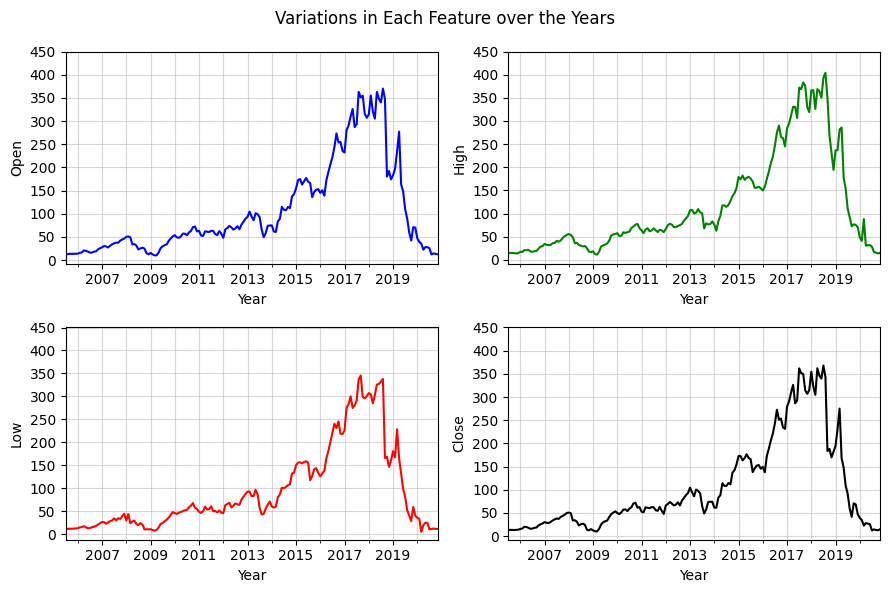

In [ ]:
plt.figure(figsize = (9, 6))
plt.suptitle('Variations in Each Feature over the Years')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'black']
  plt.subplot(2, 2, i + 1)
  df[df.columns[i]].plot(color = color_list[i])
  plt.yticks(range(0 , 500, 50))
  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.xlabel('Year')
  plt.ylabel(f'{df.columns[i]}')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To know how the Open, High, Low, Close price variables individually change over the years.

##### 2. What is/are the insight(s) found from the chart?

* As expected, the dip in the price variables after 2018 can easily be observed.


#### Chart - 3: Histogram and KDE Plot - Overall Distribution of Each Variable

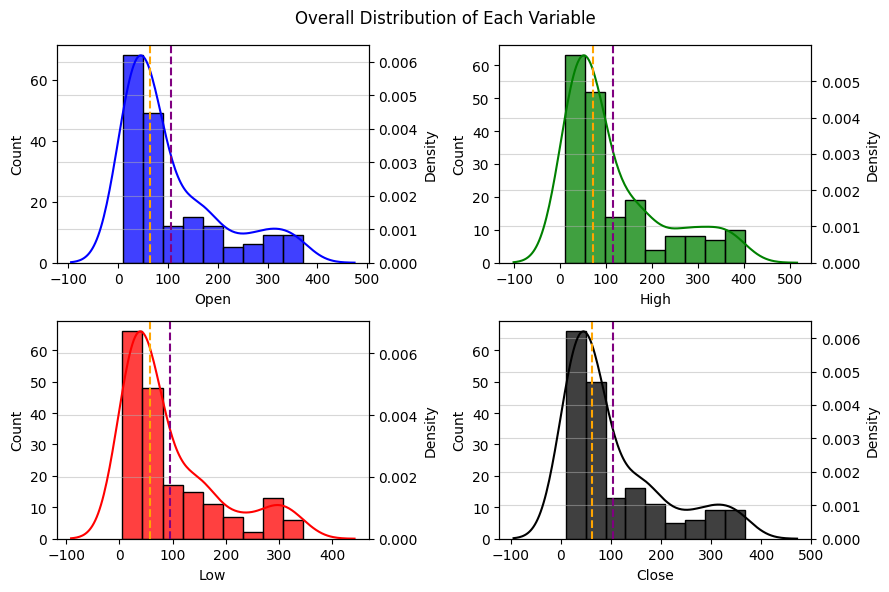

In [ ]:
plt.figure(figsize = (9, 6))
plt.suptitle('Overall Distribution of Each Variable')

for i in range(len(df.columns)):

  color_list = ['blue', 'green', 'red', 'black']

  plt.subplot(2, 2, i + 1)
  ax1 = plt.gca()
  sns.histplot(df[df.columns[i]], color = color_list[i], ax = ax1)
  ax2 = ax1.twinx()
  sns.kdeplot(df[df.columns[i]], color = color_list[i], ax = ax2)   # Overlapping the KDE plot on the histogram.

  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.axvline(df[df.columns[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)
  plt.axvline(df[df.columns[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)

plt.tight_layout()


##### 1. Why did you pick the specific chart?

* To check how the overall data within the Open, High, Low, Close columns are distributed.

##### 2. What is/are the insight(s) found from the chart?

* All these four distributions are positively skewed.

#### Chart - 4: Boxplots: Studying the Outliers

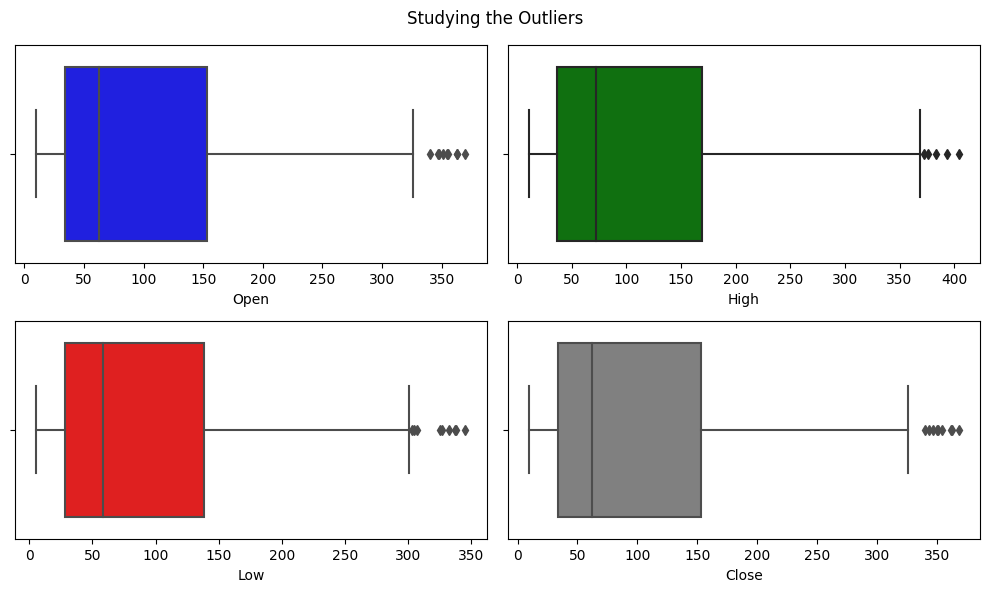

In [ ]:
plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Outliers')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'grey']
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = df[df.columns[i]], color = color_list[i])

plt.tight_layout()


##### 1. Why did you pick the specific chart?

* To study the outliers present in each feature.

##### 2. What is/are the insight(s) found from the chart?

* There are some outliers present in each of the features which will be taken care of before proceeding to the model fitting.

#### Chart - 5: Scatter Plot - Studying the Correletation between the Independent and Dependent Variables

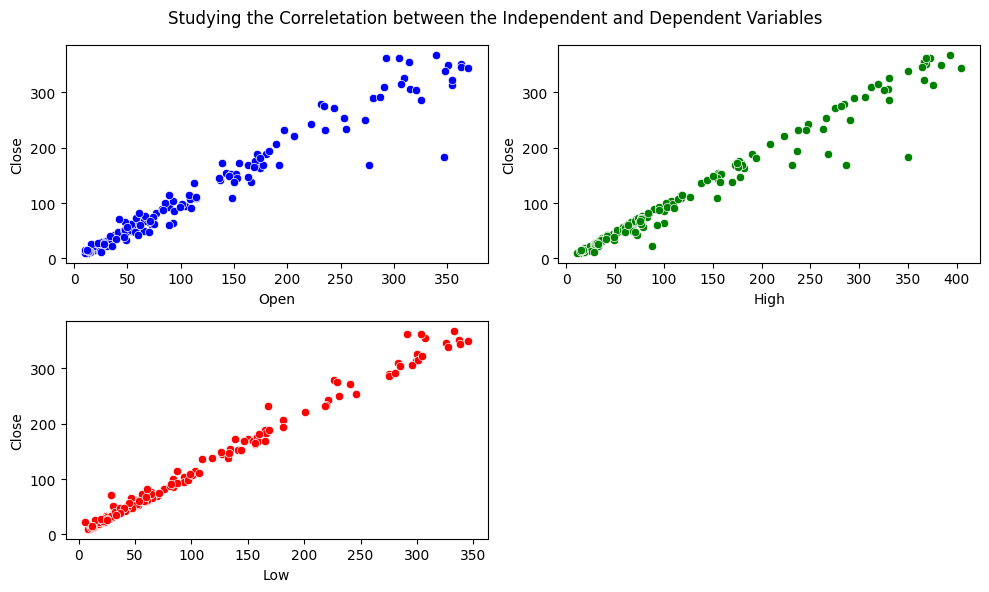

In [ ]:
plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Correletation between the Independent and Dependent Variables')
for i in range(len(df.columns) - 1):
  color_list = ['blue', 'green', 'red']
  plt.subplot(2, 2, i + 1)
  sns.scatterplot(x = df[df.columns[i]], y = df['Close'], color = color_list[i])

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To study the correlation between the indepdent variables (Open, High, Low) and the dependent variable (Close).

##### 2. What is/are the insight(s) found from the chart?

* The independent variables are highly correlated with the dependent variable.

#### Chart - 6 - Correlation Heatmap

<Axes: >

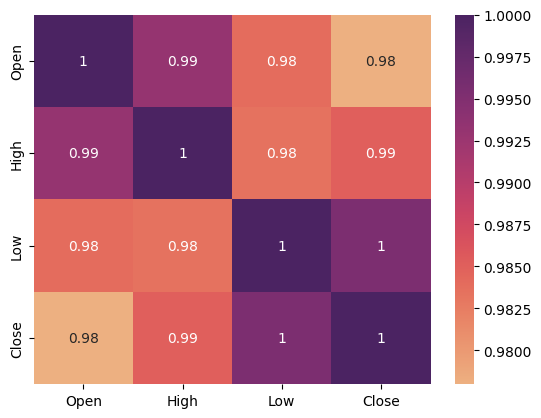

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

* To dig deeper into how the variables are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?

* As seen earlier the independent variables (Open, High and Low) have a very high correlation with the dependent variable (Class), which is a desirable characteristic in the dataset.

* The independent variables (Open, High and Low) have a very high correlation among themselves, which is a case of multicollinearity. Multicollinearity can be problematic for the regression models. This is to be fixed in the Data Pre-processing part.

#### Chart - 7 - Pair Plot

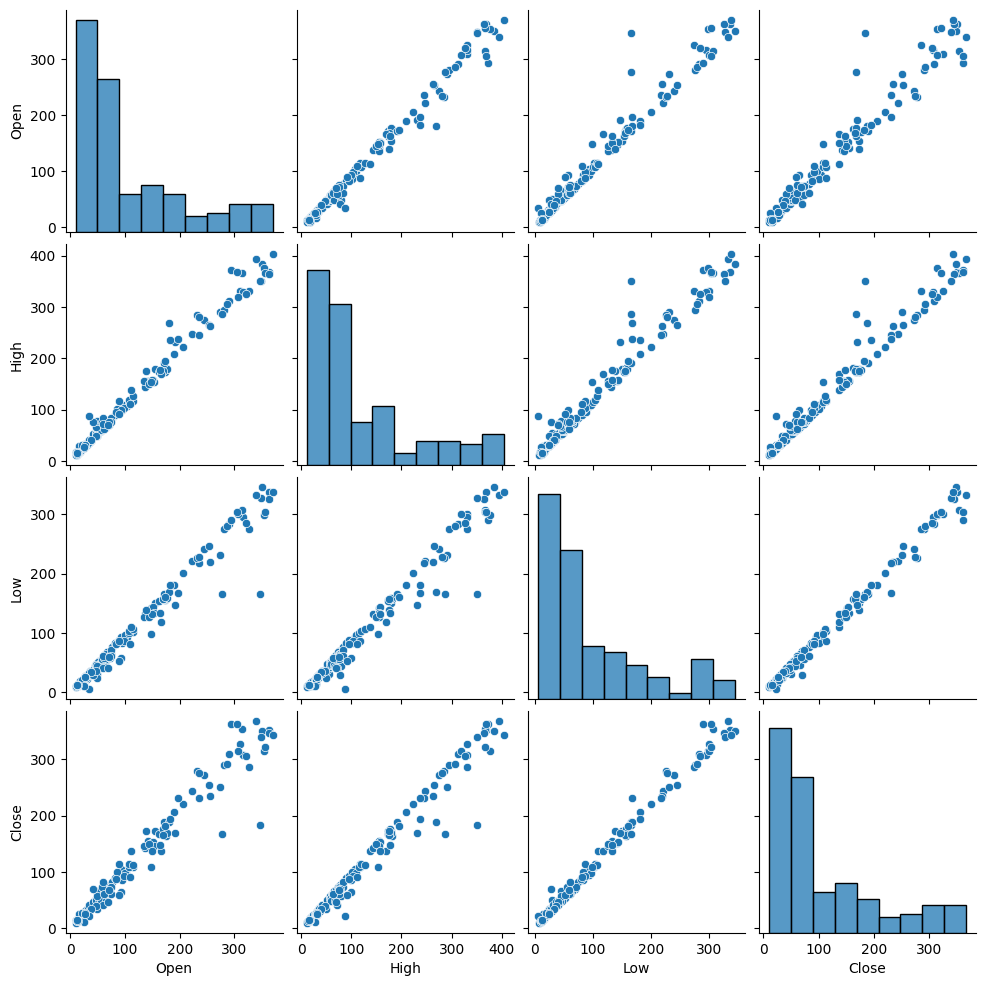

In [ ]:
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

* To get an overall summary of the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

As seen earlier:
* The Open, High and Low variables highly correlated with the Close variable.
* The Open, High and Low variables are also highly correlated with each other.



## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

* As we have checked earlier, there were no missing values in the dataset. So no need for any missing values imputation techniques.

### 2. Handling Outliers

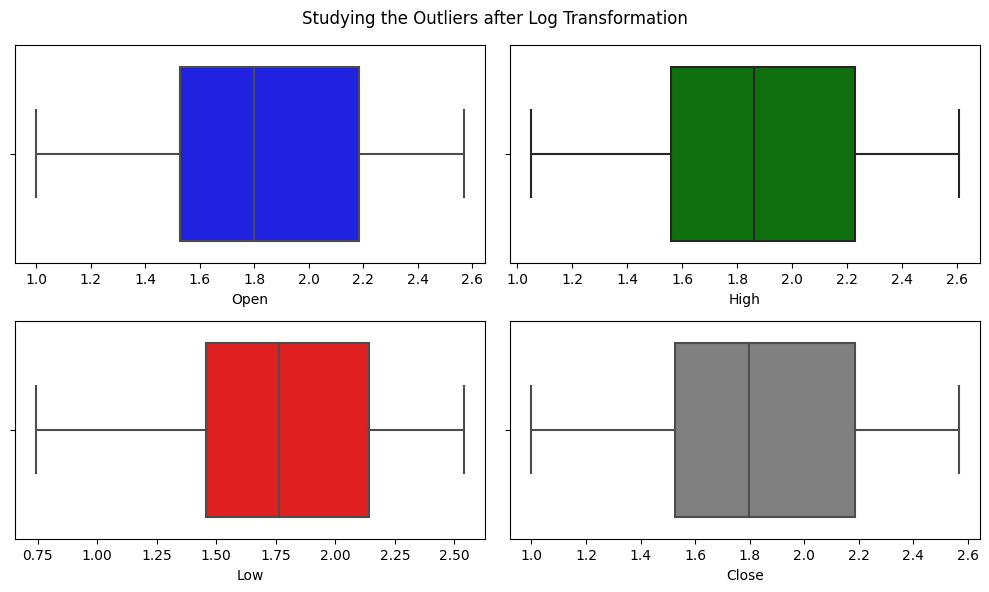

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize = (10, 6))
plt.suptitle('Studying the Outliers after Log Transformation')

for i in range(len(df.columns)):
  color_list = ['blue', 'green', 'red', 'grey']
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = np.log10(df[df.columns[i]]), color = color_list[i])   # Using log transformation on the feature.

plt.tight_layout()


* As can be seen above, after the log transformation of the features. No outliers remain.

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Log transformation was used for outlier treatment. (Also log transformation is going to be used later to take care of the skewness in the features' distribution, so it is like solving two problems with one solution)

### 3. Categorical Encoding

* There are only numerical features in our dataset. So, no need for any categorical encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# First, checking the Variance Inflation Factor for each feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe to store the vif for each of the features.
vif_df = pd.DataFrame()

vif_df['Features'] = list(df.columns)[:-1]

vif_df['VIF'] = [variance_inflation_factor(df.iloc[:, :-1], i) for i in range(len(df.iloc[:, :-1].columns))]

vif_df

,Features,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* The VIFs for all the features are on the higher side. But as the data is small having only 3 independent variable and that too of the numerical type, so there is not much scope of any feature manipulation which may prove useful.

#### 2. Feature Selection

* As the dataset is already very small, any kind of feature selection is senseless.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* The data needs to be transformed because the distribution of the features are skewed and we need to transform them as close to normal distribution as possible. So, a log transformation is going to be implemented. As seen earlier, it would be also helpful in taking care of the outliers.

In [ ]:
# Transform Your data

for i in range(len(df.columns)):
  df[df.columns[i]] = np.log10(df[df.columns[i]])

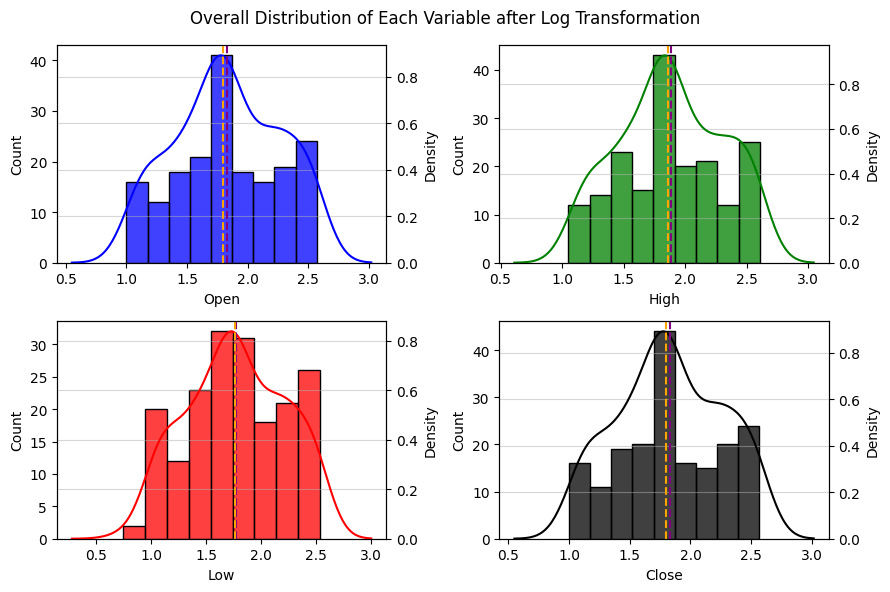

In [ ]:
# Checking the distributions of the features again:

plt.figure(figsize = (9, 6))
plt.suptitle('Overall Distribution of Each Variable after Log Transformation')

for i in range(len(df.columns)):

  color_list = ['blue', 'green', 'red', 'black']

  plt.subplot(2, 2, i + 1)
  ax1 = plt.gca()
  sns.histplot(df[df.columns[i]], color = color_list[i], ax = ax1)
  ax2 = ax1.twinx()
  sns.kdeplot(df[df.columns[i]], color = color_list[i], ax = ax2)   # Overlapping the KDE plot on the histogram.

  plt.grid(which = 'major', alpha = 0.5)
  plt.grid(which = 'minor', alpha = 0.5)
  plt.axvline(df[df.columns[i]].mean(), color = 'purple', linestyle = 'dashed', linewidth = 1.5)
  plt.axvline(df[df.columns[i]].median(), color = 'orange', linestyle = 'dashed', linewidth=1.5)

plt.tight_layout()

* Now, it can be seen that the distributions are a bit closer to a normal distribution compared to before. The mean (purple vertical line) and the median (the yellow vertical line) are almost equal in all the cases.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality reduction is not needed because the dataset is already too small.

### 7. Data Splitting

In [ ]:
# Split your data to train and test datasets. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##### What data splitting ratio have you used and why?

* An 80:20 split ratio is being used. As we are working on a small dataset, more data may be needed for training the model.

### 8. Data Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Checking the training dataset
X_train[0: 10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

In [ ]:
# Checking the test dataset
X_test[0: 10]

array([[-0.65205247, -0.74351467, -0.66245523],
       [ 0.90986063,  0.82102055,  0.88229187],
       [ 0.0994373 , -0.01850911, -0.30663666],
       [ 0.7961367 ,  0.74491569,  0.87275245],
       [-0.07074439, -0.04337995,  0.06468081],
       [-0.8726779 , -0.79368304, -0.71684963],
       [ 1.35640166,  1.3141555 ,  1.37204697],
       [-1.46313114, -1.54216502, -1.27807511],
       [-1.60708132, -1.71488829, -1.44741967],
       [ 1.09458045,  1.27547366,  1.18581212]])

##### Which method have you used to scale you data and why?

* Standard scaler is used here, as we would be mainly dealing with linear regression which assumes normally distributed features.

## ***6. ML Model Implementation***

### ML Model - 1: Linear Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the model
y_pred_lin = linear_reg.predict(X_test)

In [ ]:
# Checking the model parameters
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coefficients: [[-0.22992597  0.33533242  0.31585415]]
Intercept: [1.79986471]


Text(0.5, 1.0, 'Linear Regression')

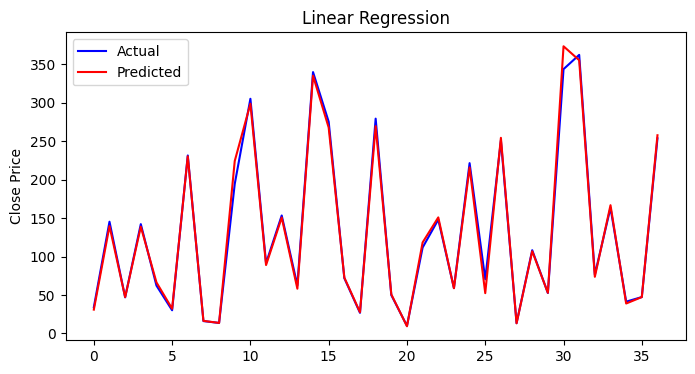

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_lin, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Linear Regression")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression basically tries to establish a linear relationship between the independent and the dependent variables by minimising the sum of squared differences between the actual and the predicted dependent values.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Mean Squared Error
mse_lin = round( mean_squared_error((10**y_test), 10**(y_pred_lin)), 4)

# Root Mean Squared Error
rmse_lin = round(np.sqrt(mse_lin), 4)

# Mean Absolute Error
mae_lin = round(mean_absolute_error((10**y_test), 10**(y_pred_lin)), 4)

# R-2 Score
r2_lin = round(r2_score((10**y_test), (10**y_pred_lin)), 4)

# Adjusted R-2 Score
adj_r2_lin = round(1 - (1 - r2_lin)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)


In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_lin = pd.DataFrame()
evametdf_lin['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_lin['Linear Regression'] = [mse_lin, rmse_lin, mae_lin, r2_lin, adj_r2_lin]
evametdf_lin

,Metrics,Linear Regression
0,Mean Squared Error,70.4204
1,Root Mean Squared Error,8.3917
2,Mean Absolute Error,4.8168
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


### ML Model - 2: Ridge Regression

In [ ]:
# ML Model - 2 Implementation
from sklearn.linear_model import Ridge
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Predict on the model
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Checking the model parameters
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Coefficients: [[-0.04345886  0.20725036  0.25547572]]
Intercept: [1.79986471]


Text(0.5, 1.0, 'Ridge Regression')

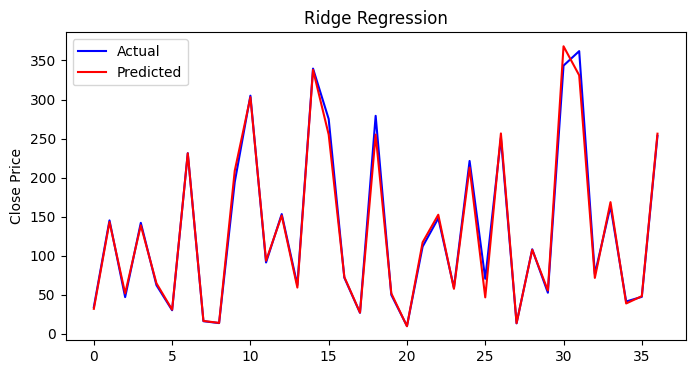

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_ridge, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Ridge Regression")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a regularisation technique used for Linear Regression models by adding the sum of squared values of the coefficients as the penalty term to the loss function which limits the coefficients' magnitude and helps reduce overfitting.

In [ ]:
# Mean Squared Error
mse_ridge = round( mean_squared_error((10**y_test), 10**(y_pred_ridge)), 4)

# Root Mean Squared Error
rmse_ridge = round(np.sqrt(mse_ridge), 4)

# Mean Absolute Error
mae_ridge = round(mean_absolute_error((10**y_test), 10**(y_pred_ridge)), 4)

# R-2 Score
r2_ridge = round(r2_score((10**y_test), (10**y_pred_ridge)), 4)

# Adjusted R-2 Score
adj_r2_ridge = round(1 - (1 - r2_ridge)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_ridge = pd.DataFrame()
evametdf_ridge['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_ridge['Ridge Regression'] = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge, adj_r2_ridge]
evametdf_ridge

,Metrics,Ridge Regression
0,Mean Squared Error,98.1690
1,Root Mean Squared Error,9.9080
2,Mean Absolute Error,5.7810
3,R-2 Score,0.9913
4,Adjusted R-2 Score,0.9905


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0, 1, 5, 10, 25, 50, 100, 200, 500, 1000, 5000, 10000]}

ridge_gscv = GridSearchCV(ridge, param_grid = ridge_param_grid, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm
ridge_gscv.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0, 1, 5, 10, 25, 50,
                                   100, 200, 500, 1000, 5000, 10000]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predict on the model
y_pred_ridge_gscv = ridge_gscv.predict(X_test)

In [ ]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", ridge_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.01}


In [ ]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", ridge_gscv.best_estimator_.coef_)
print("Intercept:", ridge_gscv.best_estimator_.intercept_)

Coefficients: [[-0.22603186  0.33254364  0.31471816]]
Intercept: [1.79986471]


Text(0.5, 1.0, 'Ridge Regression with GridSearchCV')

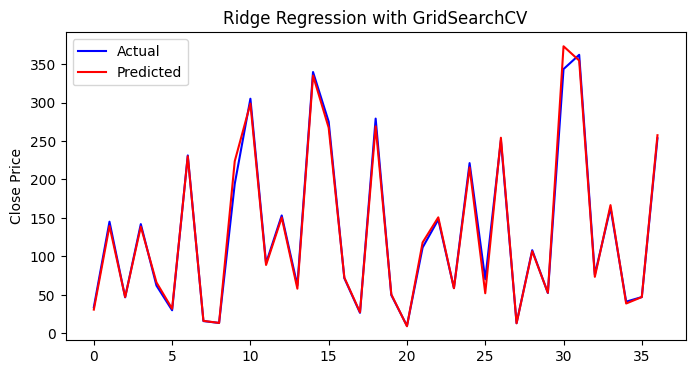

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_ridge_gscv, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Ridge Regression with GridSearchCV")

In [ ]:
# Mean Squared Error
mse_ridge_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# Root Mean Squared Error
rmse_ridge_gscv = round(np.sqrt(mse_ridge_gscv), 4)

# Mean Absolute Error
mae_ridge_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# R-2 Score
r2_ridge_gscv = round(r2_score((10**y_test), (10**y_pred_ridge_gscv)), 4)

# Adjusted R-2 Score
adj_r2_ridge_gscv = round(1 - (1 - r2_ridge_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_ridge_gscv = pd.DataFrame()
evametdf_ridge_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_ridge_gscv['Ridge Regression with GridSearchCV'] = [mse_ridge_gscv, rmse_ridge_gscv, mae_ridge_gscv, r2_ridge_gscv, adj_r2_ridge_gscv]
evametdf_ridge_gscv

,Metrics,Ridge Regression with GridSearchCV
0,Mean Squared Error,70.2641
1,Root Mean Squared Error,8.3824
2,Mean Absolute Error,4.8334
3,R-2 Score,0.9938
4,Adjusted R-2 Score,0.9932


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used here as we are using a smaller set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
ridge_comp_df = pd.concat([evametdf_ridge, evametdf_ridge_gscv.iloc[:, 1]], axis = 1)
ridge_comp_df

,Metrics,Ridge Regression,Ridge Regression with GridSearchCV
0,Mean Squared Error,98.1690,70.2641
1,Root Mean Squared Error,9.9080,8.3824
2,Mean Absolute Error,5.7810,4.8334
3,R-2 Score,0.9913,0.9938
4,Adjusted R-2 Score,0.9905,0.9932


* Ridge Regression with GridSearchCV performed better the Error metrics are lower for it.

### ML Model - 3: Lasso Regression

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)

# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Checking the model parameters
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Coefficients: [0.         0.16764373 0.24296035]
Intercept: [1.79986471]


Text(0.5, 1.0, 'Lasso Regression')

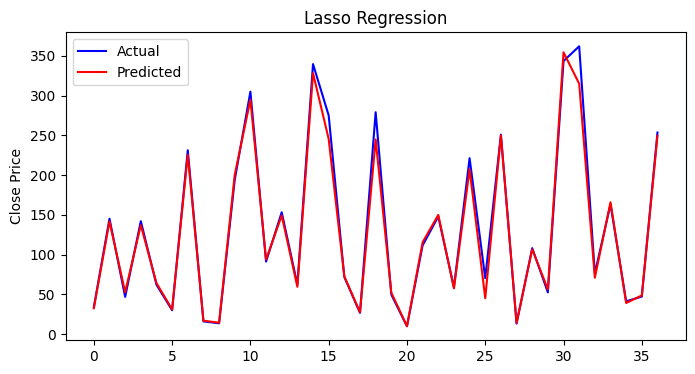

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_lasso, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Lasso Regression")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso Regression is a regularisation technique used for Linear Regression models by adding the sum of absolute value of the coefficients as the penalty term to the loss function which limits the coefficients' magnitude and helps reduce overfitting. Lasso regression is capable of reducing the coefficients all the way to zero.

In [ ]:
# Mean Squared Error
mse_lasso = round( mean_squared_error((10**y_test), 10**(y_pred_lasso)), 4)

# Root Mean Squared Error
rmse_lasso = round(np.sqrt(mse_lasso), 4)

# Mean Absolute Error
mae_lasso = round(mean_absolute_error((10**y_test), 10**(y_pred_lasso)), 4)

# R-2 Score
r2_lasso = round(r2_score((10**y_test), (10**y_pred_lasso)), 4)

# Adjusted R-2 Score
adj_r2_lasso = round(1 - (1 - r2_lasso)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_lasso = pd.DataFrame()
evametdf_lasso['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_lasso['Lasso Regression'] = [mse_lasso, rmse_lasso, mae_lasso, r2_lasso, adj_r2_lasso]
evametdf_lasso

,Metrics,Lasso Regression
0,Mean Squared Error,155.0415
1,Root Mean Squared Error,12.4516
2,Mean Absolute Error,6.9696
3,R-2 Score,0.9862
4,Adjusted R-2 Score,0.9849


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

lasso_param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

lasso_gscv = GridSearchCV(lasso, param_grid = lasso_param_grid, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm
lasso_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.01),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", lasso_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 1e-05}


In [ ]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", lasso_gscv.best_estimator_.coef_)
print("Intercept:", lasso_gscv.best_estimator_.intercept_)

Coefficients: [-0.22766485  0.33373712  0.31517368]
Intercept: [1.79986471]


In [ ]:
# Predict on the model
y_pred_lasso_gscv = lasso_gscv.predict(X_test)

Text(0.5, 1.0, 'Lasso Regression with GridSearchCV')

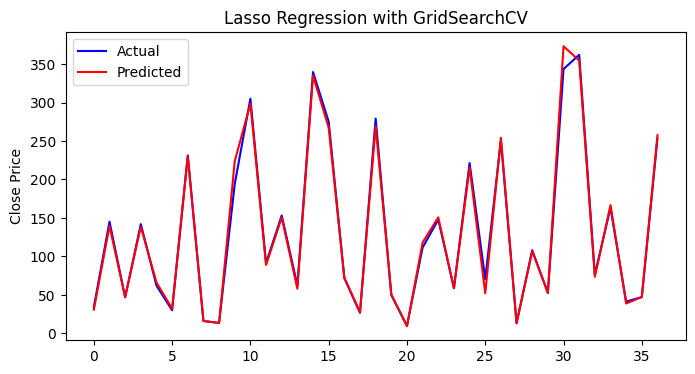

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_ridge_gscv, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Lasso Regression with GridSearchCV")

In [ ]:
# Mean Squared Error
mse_lasso_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_lasso_gscv)), 4)

# Root Mean Squared Error
rmse_lasso_gscv = round(np.sqrt(mse_lasso_gscv), 4)

# Mean Absolute Error
mae_lasso_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_lasso_gscv)), 4)

# R-2 Score
r2_lasso_gscv = round(r2_score((10**y_test), (10**y_pred_lasso_gscv)), 4)

# Adjusted R-2 Score
adj_r2_lasso_gscv = round(1 - (1 - r2_lasso_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_lasso_gscv = pd.DataFrame()
evametdf_lasso_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_lasso_gscv['Lasso Regression with GridSearchCV'] = [mse_lasso_gscv, rmse_lasso_gscv, mae_lasso_gscv, r2_lasso_gscv, adj_r2_lasso_gscv]
evametdf_lasso_gscv

,Metrics,Lasso Regression with GridSearchCV
0,Mean Squared Error,70.3311
1,Root Mean Squared Error,8.3864
2,Mean Absolute Error,4.8262
3,R-2 Score,0.9938
4,Adjusted R-2 Score,0.9932


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used here as we are using a smaller set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
lasso_comp_df = pd.concat([evametdf_lasso, evametdf_lasso_gscv.iloc[:, 1]], axis = 1)
lasso_comp_df

,Metrics,Lasso Regression,Lasso Regression with GridSearchCV
0,Mean Squared Error,155.0415,70.3311
1,Root Mean Squared Error,12.4516,8.3864
2,Mean Absolute Error,6.9696,4.8262
3,R-2 Score,0.9862,0.9938
4,Adjusted R-2 Score,0.9849,0.9932


* Lasso Regression with GridSearchCV is clearly the winner here, as the error metrics are lower and the R-2 scores are also a bit higher.

### ML Model - 4: Elastic Net Regression

In [ ]:
# ML Model - 4 Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 0.01, l1_ratio = 0.5)

# Fit the Algorithm
elasticnet.fit(X_train, y_train)


ElasticNet(alpha=0.01)

In [ ]:
# Predict on the model

y_pred_elasticnet = elasticnet.predict(X_test)

Text(0.5, 1.0, 'Elastic Net Regression')

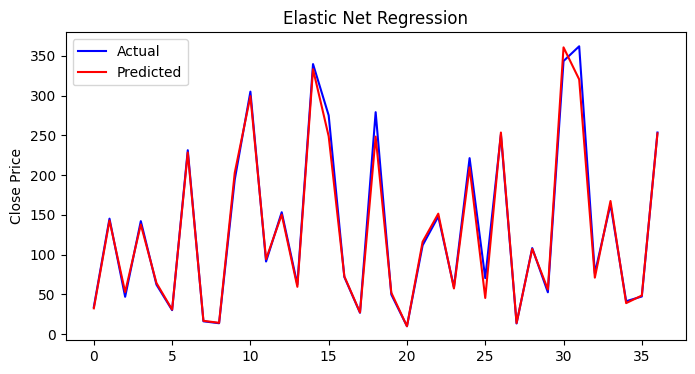

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_elasticnet, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Elastic Net Regression")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic Net Regression is a regularisation technique used for Linear Regression models which combined both the Lasso and the Ridge regularisation techniques.

In [ ]:
# Mean Squared Error
mse_elasticnet = round( mean_squared_error((10**y_test), 10**(y_pred_elasticnet)), 4)

# Root Mean Squared Error
rmse_elasticnet = round(np.sqrt(mse_elasticnet), 4)

# Mean Absolute Error
mae_elasticnet = round(mean_absolute_error((10**y_test), 10**(y_pred_elasticnet)), 4)

# R-2 Score
r2_elasticnet = round(r2_score((10**y_test), (10**y_pred_elasticnet)), 4)

# Adjusted R-2 Score
adj_r2_elasticnet = round(1 - (1 - r2_elasticnet)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_elasticnet = pd.DataFrame()
evametdf_elasticnet['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_elasticnet['Elastic Net Regression'] = [mse_elasticnet, rmse_elasticnet, mae_elasticnet, r2_elasticnet, adj_r2_elasticnet]
evametdf_elasticnet

,Metrics,Elastic Net Regression
0,Mean Squared Error,129.5273
1,Root Mean Squared Error,11.3810
2,Mean Absolute Error,6.4314
3,R-2 Score,0.9885
4,Adjusted R-2 Score,0.9875


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elasticnet_param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                         'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

elasticnet_gscv = GridSearchCV(elasticnet, param_grid = elasticnet_param_grid, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm
warnings.filterwarnings("ignore")
elasticnet_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(alpha=0.01),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000],
                         'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", elasticnet_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.001, 'l1_ratio': 0.01}


In [ ]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", elasticnet_gscv.best_estimator_.coef_)
print("Intercept:", elasticnet_gscv.best_estimator_.intercept_)

Coefficients: [-0.17843137  0.29872128  0.30054779]
Intercept: [1.79986471]


In [ ]:
# Predict on the model
y_pred_elasticnet_gscv = elasticnet_gscv.predict(X_test)

Text(0.5, 1.0, 'Elastic Net Regression with GridSearchCV')

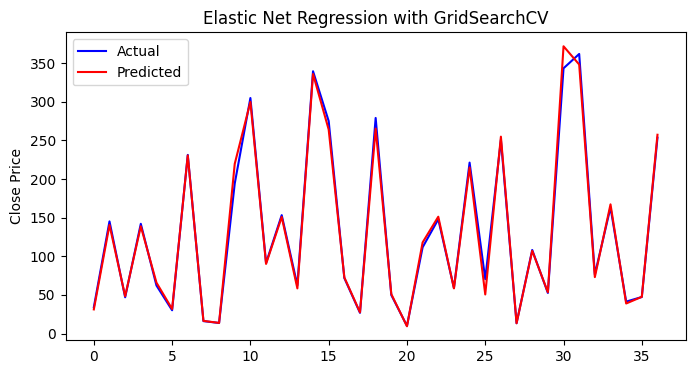

In [ ]:
# Comparing the actual Close price and the predicted Close price by plotting them
plt.figure(figsize = (8, 4))
plt.plot(np.array(10**y_test), color = 'blue')
plt.plot(10**y_pred_elasticnet_gscv, color = 'red')
plt.ylabel("Close Price")
plt.legend(["Actual", "Predicted"])
plt.title("Elastic Net Regression with GridSearchCV")

In [ ]:
# Mean Squared Error
mse_elasticnet_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# Root Mean Squared Error
rmse_elasticnet_gscv = round(np.sqrt(mse_elasticnet_gscv), 4)

# Mean Absolute Error
mae_elasticnet_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# R-2 Score
r2_elasticnet_gscv = round(r2_score((10**y_test), (10**y_pred_elasticnet_gscv)), 4)

# Adjusted R-2 Score
adj_r2_elasticnet_gscv = round(1 - (1 - r2_elasticnet_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [ ]:
# Creating a dataframe to store all the evaluation metrics
evametdf_elasticnet_gscv = pd.DataFrame()
evametdf_elasticnet_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']
evametdf_elasticnet_gscv['Elastic Net Regression with GridSearchCV'] = [mse_elasticnet_gscv, rmse_elasticnet_gscv, mae_elasticnet_gscv, r2_elasticnet_gscv, adj_r2_elasticnet_gscv]
evametdf_elasticnet_gscv

,Metrics,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.9897
1,Root Mean Squared Error,8.4255
2,Mean Absolute Error,5.0382
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV was used here as we are using a smaller set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
elasticnet_comp_df = pd.concat([evametdf_elasticnet, evametdf_elasticnet_gscv.iloc[:, 1]], axis = 1)
elasticnet_comp_df

,Metrics,Elastic Net Regression,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,129.5273,70.9897
1,Root Mean Squared Error,11.3810,8.4255
2,Mean Absolute Error,6.4314,5.0382
3,R-2 Score,0.9885,0.9937
4,Adjusted R-2 Score,0.9875,0.9931


* Elastic Net Regression with GridSearchCV performed very well here, as the error metrics are lower and R-2 scores are comparatively a bit higher.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* In this case, we are simply considering the Root Mean Square Error (RMSE) and R-2 Score for the model comparision to get a positive business impact. The outliers in the dataset has been taken care of, so no need to worry about about any sensitivity to the outliers, and the due to the small size of the dataset and the models being trained using the same predictor variables, there is no need consider any adjusted scores.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Creating a dataframe to store the evaluation metrics of the best performing models from each section

overall_evametdf = pd.concat([evametdf_lin,
                              ridge_comp_df.loc[:, 'Ridge Regression with GridSearchCV'],
                              lasso_comp_df.loc[:, 'Lasso Regression with GridSearchCV'],
                              elasticnet_comp_df.loc[:, 'Elastic Net Regression with GridSearchCV']], axis = 1)

overall_evametdf

,Metrics,Linear Regression,Ridge Regression with GridSearchCV,Lasso Regression with GridSearchCV,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.4204,70.2641,70.3311,70.9897
1,Root Mean Squared Error,8.3917,8.3824,8.3864,8.4255
2,Mean Absolute Error,4.8168,4.8334,4.8262,5.0382
3,R-2 Score,0.9937,0.9938,0.9938,0.9937
4,Adjusted R-2 Score,0.9931,0.9932,0.9932,0.9931


* As observed from the above metrics, `'Ridge Regression with GridSearchCV'` is the model we would go with, because comparatively it has the lowest (Root) Mean Squared Error metric and any Lasso Regression model should be avoided here as the models are fitted on a small dataset, so retention of all the features are essential (we have seen earlier how the Lasso Regression was capable of reducing one of the coefficient all the way to zero).

In [ ]:
# Choosing Ridge Regression with GridSearchCV as the final prediction model

final_pred_model = ridge_gscv

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

As a discussed earlier, Ridge Regression is a regularisation technique used for Linear Regression models by adding the sum of squared values of the coefficients as the penalty term to the loss function which limits the coefficients' magnitude. It helps address the issue of overfitting and multicollinearity.

GridSearchCV is a hyperparameter tuning technique in which an exhaustive search is done over predefined set of potential hyperparameters and selects the best combination of the hyperparameters for the model and evaluates using Cross-Validation.

When Ridge Regression is combined with GridSearchCV, basically Ridge Regression is being used as the base model and GridSearchCV is being used to find the optimal value of the regularisation strength (the hyperparameter controlling the penalty term).

Now, let's check the feature importance for this model:

In [ ]:
# Installing Eli5. It is a Python library used for interpreting machine learning models.

! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=cf4683e9780985fd39107967d5a4817ed6c3bf3a055ba643bcf2847be73353fe
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Importing Eli5.

import eli5

eli5.show_weights(final_pred_model.best_estimator_, feature_names = independent_variables)


Weight?,Feature
+1.800,<BIAS>
+0.333,High
+0.315,Low
-0.226,Open


* The High price feature has a weight of +0.333 which indicates that this feature has a positive influence on the predictions. An increase in the High price feature is associated with an increase in the predicted Close price.

* The Low price feature has a weight of +0.315 which indicates that this feature has a positive influence on the predictions. An increase in the Low price feature is associated with an increase in the predicted Close price.

* But, the Open price feature has a weight of -0.226 which indicates that this feature has a negative influence on the predictions. In this case, an increase in the Open price feature is associated with a decrease in the predicted Close price.

## ***8. Hypothesis Testing***

### To check the assumptions of the model, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Here, `Goldfeld-Quandt Test` is used to check whether the residuals are homoscedastic or not.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis, H<sub>0</sub> : The residuals are homoscedastic.
* Alternate Hypothesis, H<sub>A</sub> : The residuals are heteroscedastic.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Importing the libraries

from statsmodels.stats.diagnostic import het_goldfeldquandt

# Calculating the residuals
residuals = 10**y_test.values - 10**y_pred_lasso_gscv.reshape(-1, 1)

# Implementing the Goldfeld-Quandt test to check whether the residuals are homoscedastic or not.

# The p-value:
p = het_goldfeldquandt(residuals, y_pred_lasso_gscv.reshape(-1, 1))[1]

if p < 0.05:
    print('The residuals are heteroscedastic (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print('The residuals are homoscedastic (Null Hypothesis Accepted).') # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')


The residuals are homoscedastic (Null Hypothesis Accepted).

(The p-value is: 0.30549521881656116)


* As one of the assumptions of the linear regression states that the residuals should be homoscedastic. We can now say that this assumption is correct.

##### Why did you choose the specific statistical test?

* Goldfeld-Quandt Test is a statistical test commonly to check if heteroscedasticity is present in the data especially in the case of regression analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Here, `Ljungbox Test` is used to check for the autocorrelation among the residuals.

* Null Hypothesis, H<sub>0</sub> : Autocorrelation is absent among the residuals.
* Alternate Hypothesis, H<sub>A</sub> : Autocorrelation is present among the residuals.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Importing the libraries

from statsmodels.stats.diagnostic import acorr_ljungbox


# Implementing the Ljungbox test to check for the autocorrelation among the residuals.

# Choosing the minimum p-value (As all the residual values are tested):
p = min(acorr_ljungbox(residuals)['lb_pvalue'])

if p < 0.05:
    print('Autocorrelation is present among the residuals (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print('Autocorrelation is absent among the residuals (Null Hypothesis Accepted).') # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')

Autocorrelation is absent among the residuals (Null Hypothesis Accepted).

(The p-value is: 0.519197417518398)


* As one of the assumptions of the linear regression states that there should be no autocorrelation among the residuals. We can now say that this assumption is correct.

##### Why did you choose the specific statistical test?

* Ljungbox Test is statistical test commonly used to check if autocorrelations of the errors/residuals are zero or not.

### Hypothetical Statement - 3

Here, `Shapiro-Wilk Test` is used to check if the residuals are normally distributed.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis, H<sub>0</sub> : The residuals are normally distributed.
* Alternate Hypothesis, H<sub>A</sub> : The residuals are NOT normally distributed.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Importing the libraries

from scipy.stats import shapiro


# Implementing the Shapiro-Wilk Test to check if the residuals are normally distributed or not.

# The p-value:
p = shapiro(residuals)[1]

if p < 0.05:
    print('The residuals are NOT normally distributed. (Null Hypothesis Rejected).')  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print('The residuals are NOT normally distributed. (Null Hypothesis Accepted).') # Null hypothesis accepted.

print(f'\n(The p-value is: {p})')

The residuals are NOT normally distributed. (Null Hypothesis Rejected).

(The p-value is: 1.4915957535777125e-06)


* The residuals are not normally distributed.

##### Why did you choose the specific statistical test?

* Shapiro-Wilk Test is a statistical test commonly used to check if the data belongs to a normal distribution.

We can dive deeper into the residuals to check for the other assumptions:

Text(0.5, 9.444444444444438, 'Residuals')

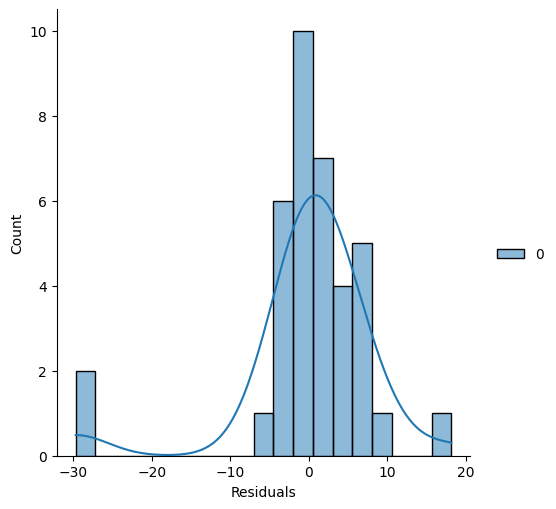

In [ ]:
# Checking the whole distribution of the residuals:
sns.displot(residuals, kde = True)
plt.xlabel('Residuals')

* It can be observed that due to a few outliers, the residuals do not have a complete normal distribution.

In [ ]:
# Checking the mean of the residuals:
mean_res = np.mean(residuals)
print('The mean of the residuals:', mean_res)

The mean of the residuals: 0.006625755514361698


* The mean of the residuals is close to zero, which satisfies another assumption of the linear regression that the mean of the residuals should be zero.

## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Upon visualising the data, it can be clearly observed that after the year of 2018 (the year the fraud involving Rana Kapoor was exposed), the stock prices
 of Yes Bank went down sharply.

* The dataset was very clean. It did not contain any missing values and duplicated rows and didn't require much further data wrangling.

* There were some outliers in the features. A log transformation was implemented on all the features and de-emphasized the outliers.

* A positive skewness was observed in all the features, but the log transformation took care of it.

* A highly positive correlation was observed between the independent variables ('Open', 'High' and 'Low') and the dependent variable ('Close'). This is a good sign that the dependent variables can be predicted accurately from the indepedent variables.

* The independent variables are also positively correlated to each other, which is a case of multicollinearity. As the dataset is a very small one, removal of features was not recommended. We expect the regularisation methods to take of the multicollinearity upto some extent.

* Several regression models were implemented here and all of them were found to perform quite well and their evaluation metrics were very close to each other. But, among them, Ridge Regression with GridSearchCV was chosen as the final prediction model with an RMSE of 8.3824	and an R-2 score of 0.9938.

* Among the features, the 'High' and 'Low' features were found to have positive weights which indicates positive influence on the predictions. But, the 'Open' was found to have a negative weight which means that the presence of this feature has an negative influence on the prediction.

* The assumptions of the residuals being homoscedastic, not autocollinear and having a mean of zero are satisfied.